# Probability
##### The laws of probability are so true in general, so fallacious in particular. - Edward Gibbon

In [ ]:
%%capture
# To supress the output when calling Statistics file
%run ./Statistics.ipynb
import random as random
import matplotlib.pyplot as plt
from collections import Counter

### Conditional probability
If a family has 2 children. What is the probability that both are girls conditional on older being girl ? 
What is the probability that both are girls conditional on either is a girl ?

In [ ]:
def random_kid():
    return random.choice(["boy", "girl"])

both_girls  = 0
older_girl  = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older   = random_kid()
    if older == "girl":
        older_girl +=1
    if older == "girl" and younger == "girl":
        both_girls +=1
    if older == "girl" or younger == "girl":
        either_girl +=1
        
print("P(both|older):", both_girls/older_girl)
print("P(both|either):", both_girls/either_girl)

### Continuous Distributions

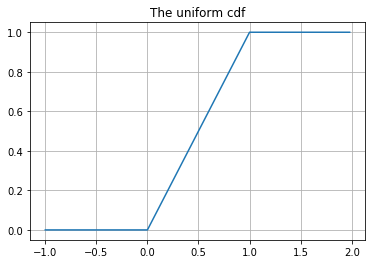

In [114]:
def uniform_pdf(x):
    return 1 if x>=0 and x<1 else 0

def uniform_cdf(x):
    if x>=0 and x<1:
        return x
    elif x<0:
        return 0
    else:
        return 1
    
xs = [x/50 for x in range(-50,100)]
plt.plot(xs, list(map(uniform_cdf,xs)))
plt.title("The uniform cdf")
plt.grid()
plt.show()

### Normal Distribution

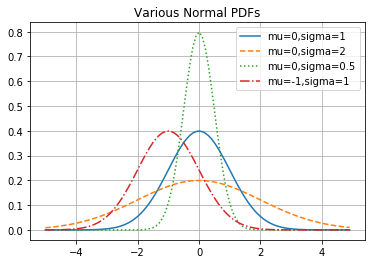

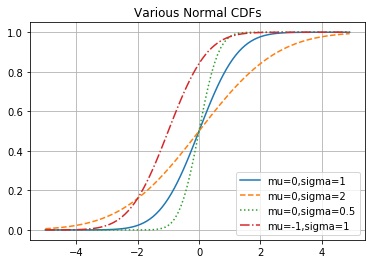

In [115]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return 1/(sqrt_two_pi*sigma)*(math.exp(-(x-mu)**2/(2*sigma**2)))
    
xs = [x/10 for x in range(-50, 50)]
plt.plot(xs, list(map(lambda x: normal_pdf(x,sigma=1),xs)),'-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs],'--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs],'-.', label='mu=-1,sigma=1')
plt.title("Various Normal PDFs")
plt.legend()
plt.grid()
plt.show()

def normal_cdf(x,mu=0,sigma=1):
    return (1+ math.erf((x-mu)/math.sqrt(2)/sigma))/2

plt.plot(xs, list(map(lambda x: normal_cdf(x,sigma=1),xs)),'-',label='mu=0,sigma=1')
plt.plot(xs, list(map(lambda x: normal_cdf(x,sigma=2),xs)),'--',label='mu=0,sigma=2')
plt.plot(xs, list(map(lambda x: normal_cdf(x,sigma=0.5),xs)),':',label='mu=0,sigma=0.5')
plt.plot(xs, list(map(lambda x: normal_cdf(x,mu=-1),xs)),'-.',label='mu=-1,sigma=1')
plt.title("Various Normal CDFs")
plt.legend(loc="lower right")
plt.grid()
plt.show()

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # If not standards, convert to standard and rescale (Note: the first return statement is returned in a function)
    if mu!=0 or sigma!=1:
        return mu+sigma*inverse_normal_cdf(p,tolerance=tolerance)
    
    lo_z = -10.0  # normal_cdf(-10) is very close to 0
    hi_z  = 10.0   # normal_cdf(10) is very close to 1
    while (hi_z - lo_z) > tolerance:
        mid_z = mean([hi_z,lo_z])
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            lo_z = mid_z
        elif mid_p > p:
            hi_z = mid_z
        else:
            break
    
    return mid_z

### The Central limit theorem

In [117]:
def bernoulli_trial(p):
    return 1 if random.random()<=p else 0

def binomial(n,p):
    return sum([bernoulli_trial(p) for _ in range(n)])

Here's an exercise that approximates Normal distribution as Binomial(n,p) for large n

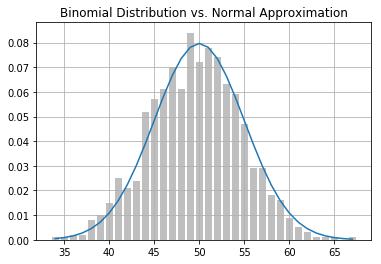

In [119]:
def make_hist(p, n, num_points):
    
    data = [binomial(n,p) for _ in range(num_points)]
    
    # use bar chart to show the actual samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], [y/num_points for y in histogram.values()], color='0.75')
    
    mu    = p*n
    sigma = math.sqrt(n*p*(1-p))
    
    # use line plot to show approximate normal distribution with continuity correction
    xs   = range(min(data),max(data)+1)
    ys   = [normal_cdf(x+0.5, mu, sigma) - normal_cdf(x-0.5, mu, sigma) for x in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.grid()
    plt.show()
    
make_hist(0.5, 100,1000)